# StationSim basic experiment
    authors: A. West
    created: 2019-06-24
    version: 0.2 (jupyter)

# Imports

#### Import Model

In [2]:
from sys import path
path.append('..')
from stationsim.stationsim import Model

#### Time stamp for files

In [3]:
from time import strftime
id = strftime('%y%m%d_%H%M%S')

#### Consistent random numbers

In [4]:
from numpy.random import seed
seed(1)

## Create
Parameters can be passed to the model as a dictionary. E.g. like this:

In [8]:
model_params = { 'pop_total':700, 'width': 200, 'height': 100 }
model = Model(**model_params)

or as separate parameters

In [9]:
model = Model(pop_total=500)

You can change and review the parameters that control the model using `model.params`, and `model.params_changed` (showing the differences from the default).

In [10]:
print('Params:', model.params)
print('Change:', model.params_changed)

Params: {'pop_total': 500, 'width': 400, 'height': 200, 'gates_in': 3, 'gates_out': 2, 'gates_space': 1, 'gates_speed': 1, 'speed_min': 0.2, 'speed_mean': 1, 'speed_std': 1, 'speed_steps': 3, 'separation': 5, 'max_wiggle': 1, 'step_limit': 3600, 'do_history': True, 'do_print': True}
Change: {'pop_total': 500}


At the end of the dictionary are two useful boolean parameters:  
`do_print` is there as a tool to mute printing from within the model.  
`do_history` is a performance tool if analytics are not required after running.  Most useful in profiling.


_More detail are in the parametric study._

For now we will us a model without any parameters and it will use default values (this gives a warning that can be ignored)

In [11]:
model = Model()

../stationsim/stationsim.py:262: RuntimeWarning: No parameters have been passed to the model; using the default parameters: {'pop_total': 100, 'width': 400, 'height': 200, 'gates_in': 3, 'gates_out': 2, 'gates_space': 1, 'gates_speed': 1, 'speed_min': 0.2, 'speed_mean': 1, 'speed_std': 1, 'speed_steps': 3, 'separation': 5, 'max_wiggle': 1, 'step_limit': 3600, 'do_history': True, 'do_print': True}
  RuntimeWarning


## Run

Run the model by repeatedly calling its `step` function.

In [6]:
for _ in range(model.step_limit):
    model.step()

	Iteration: 0/3600
	Iteration: 100/3600
	Iteration: 200/3600
	Iteration: 300/3600
	Iteration: 400/3600
	Iteration: 500/3600
	Iteration: 600/3600
	Iteration: 700/3600
	Iteration: 800/3600
	Iteration: 900/3600
	Iteration: 1000/3600
	Iteration: 1100/3600
	Iteration: 1200/3600
	Iteration: 1300/3600
	Iteration: 1400/3600
	Iteration: 1500/3600
	Iteration: 1600/3600
	Iteration: 1700/3600
	Iteration: 1800/3600
	Iteration: 1900/3600
StationSim None - Everyone made it!


## Review
There are several ways to review the model.  Here is a comprehensive list of them, with additional methods for saving, if required.  `StationSim 0.8.0`
#### `get_analytics`
Provides a dictionary of analytics.
#### `get_trails`
A line graph following each agent's path.
#### `get_histogram`
A histogram of the time taken for each agent, their expected time, and their delay.  _I believe this is the most visible method for demonstrating that agents in this model interact._
#### `get_wiggle_map`
A `seaborn.kdeplot` that shows where agents have collided, either with each other or the enviroment.  Also includes where each wiggle has taken place.  _For faster generation a contour plot is made by setting_ `do_kdeplot=False`
#### `get_location_map`
Also a `kdeplot` but for all agent locations.  _Or_ `do_kdeplot=False`
#### `get_ani`
An animation of agents moving.


{'Finish Time': 1913, 'Total': 100, 'Active': 0, 'Finished': 100, 'Time Taken': 579.64, 'Time Expected': 419.63867369778404, 'Time Delay': 160.00132630221597, 'Collisions': 790.94, 'Wiggles': 54.28}


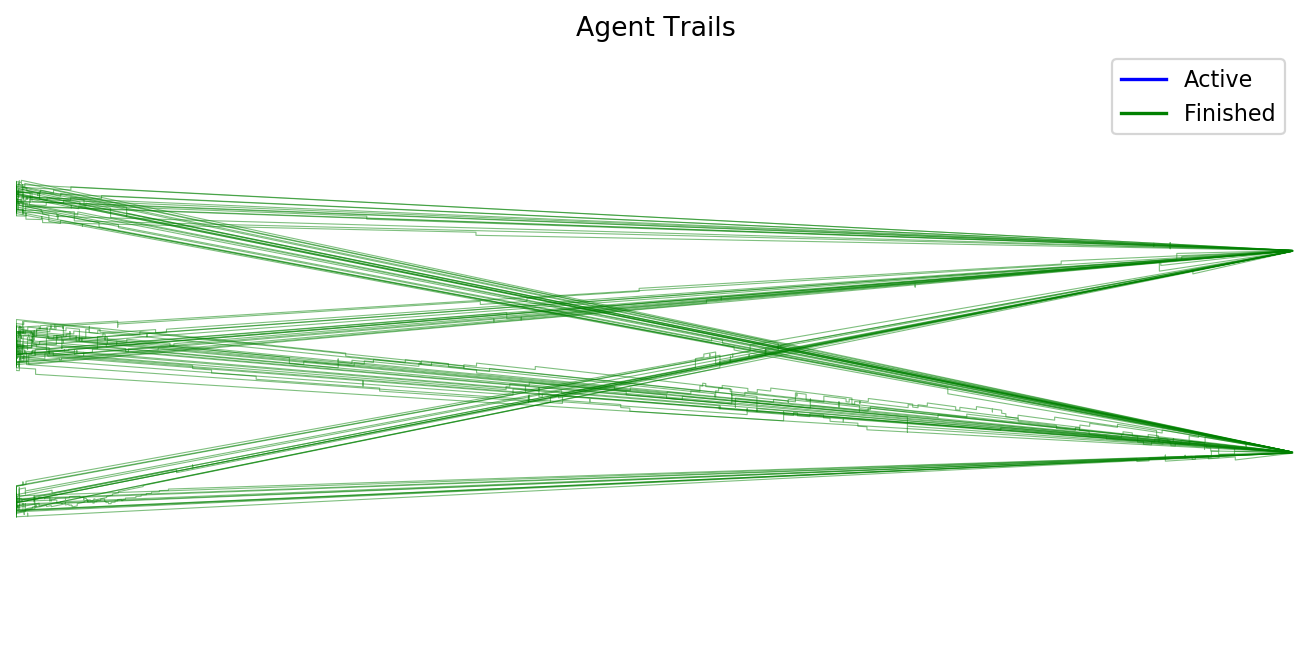

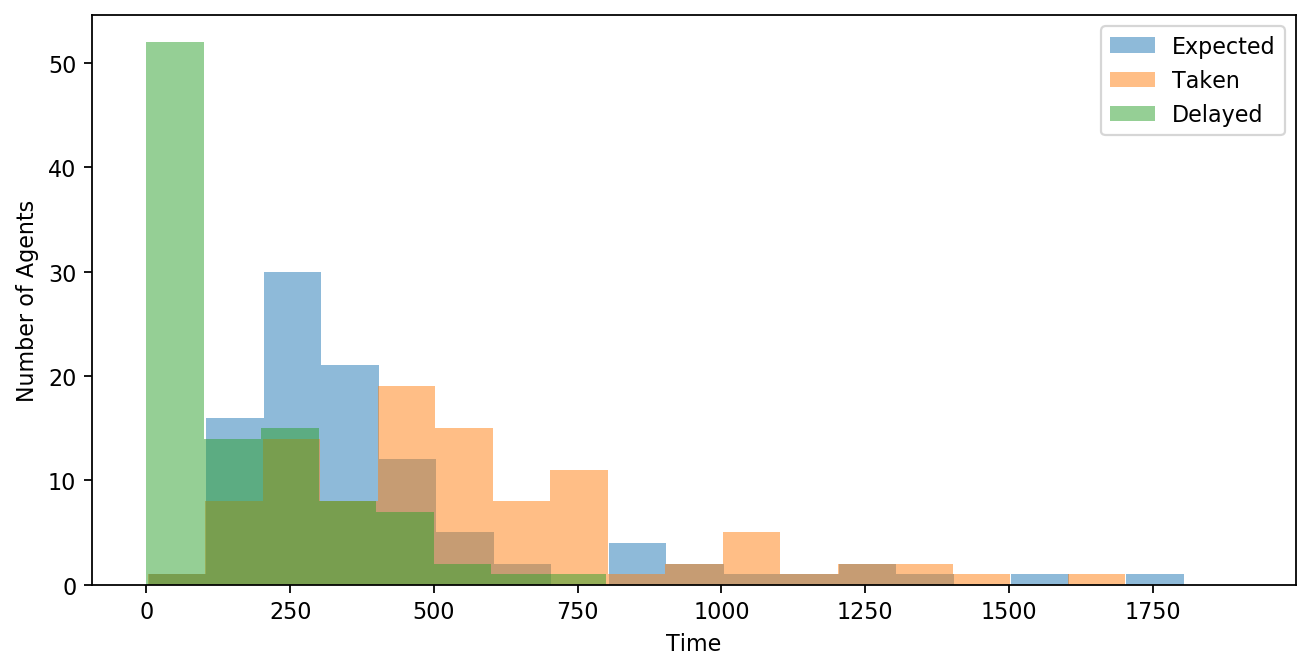

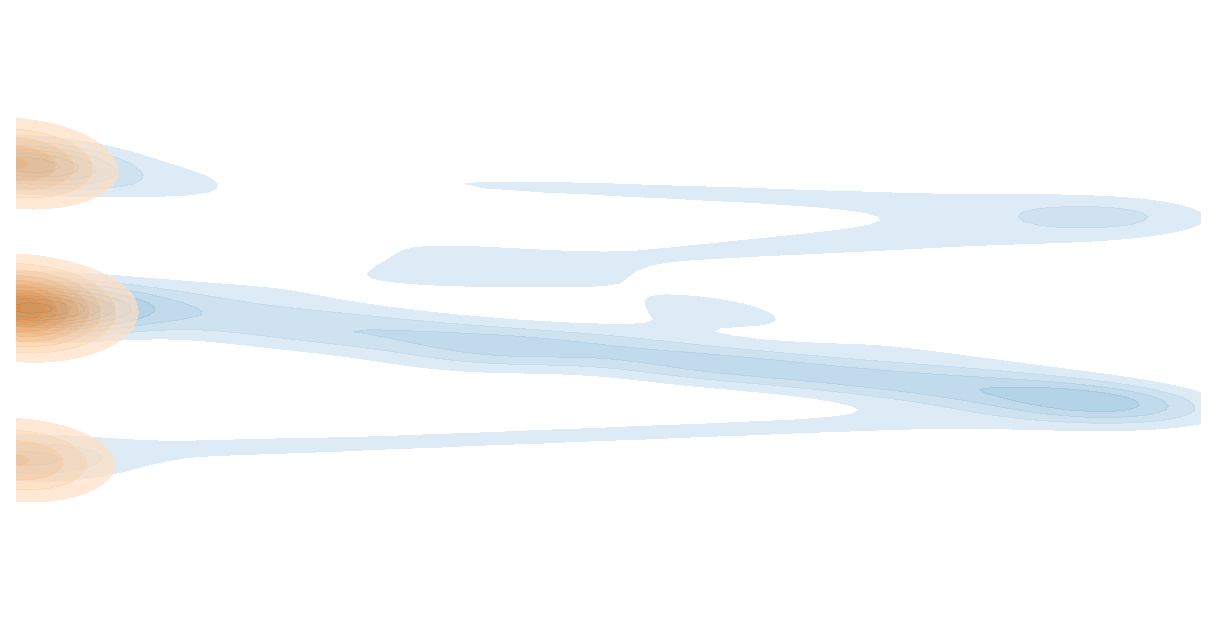

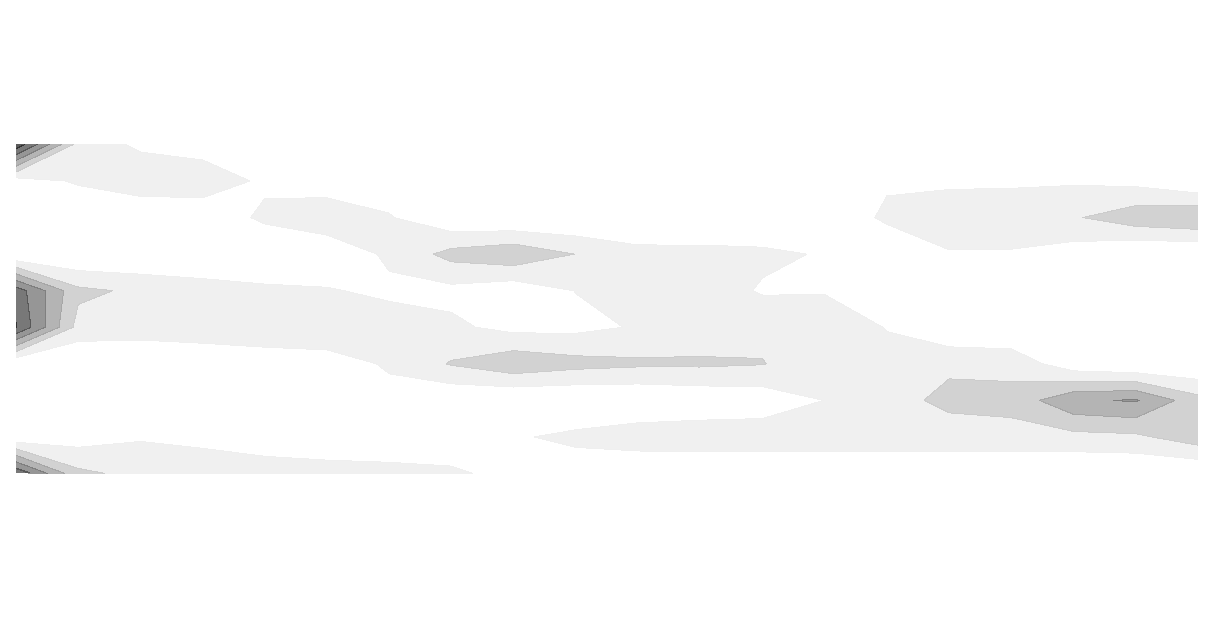

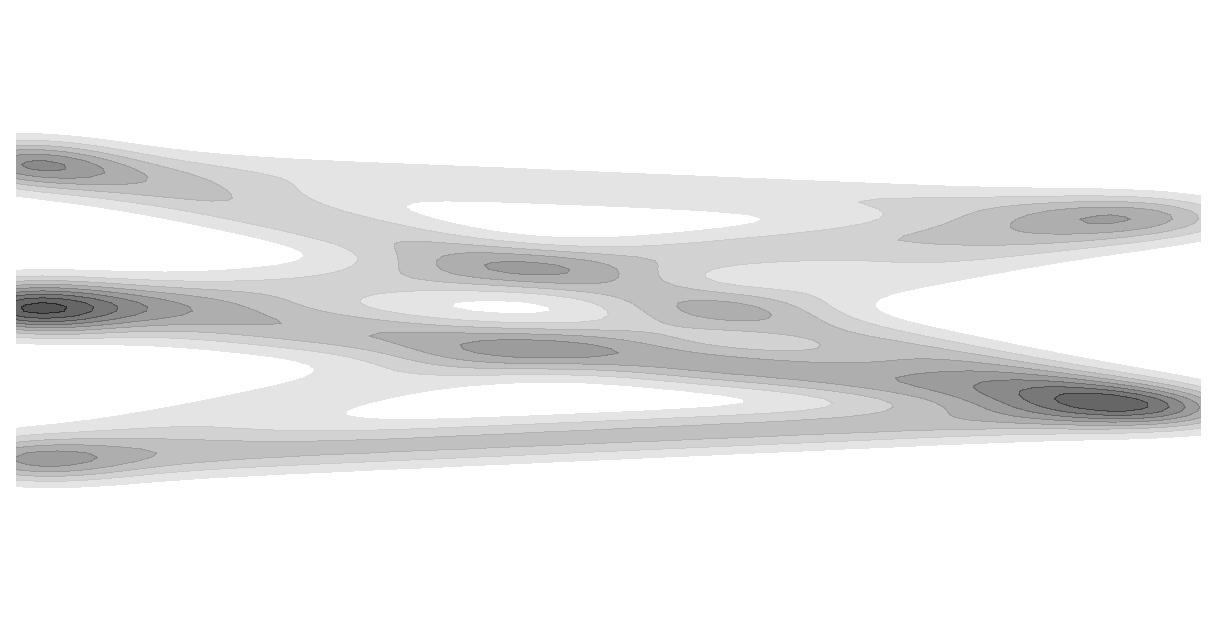

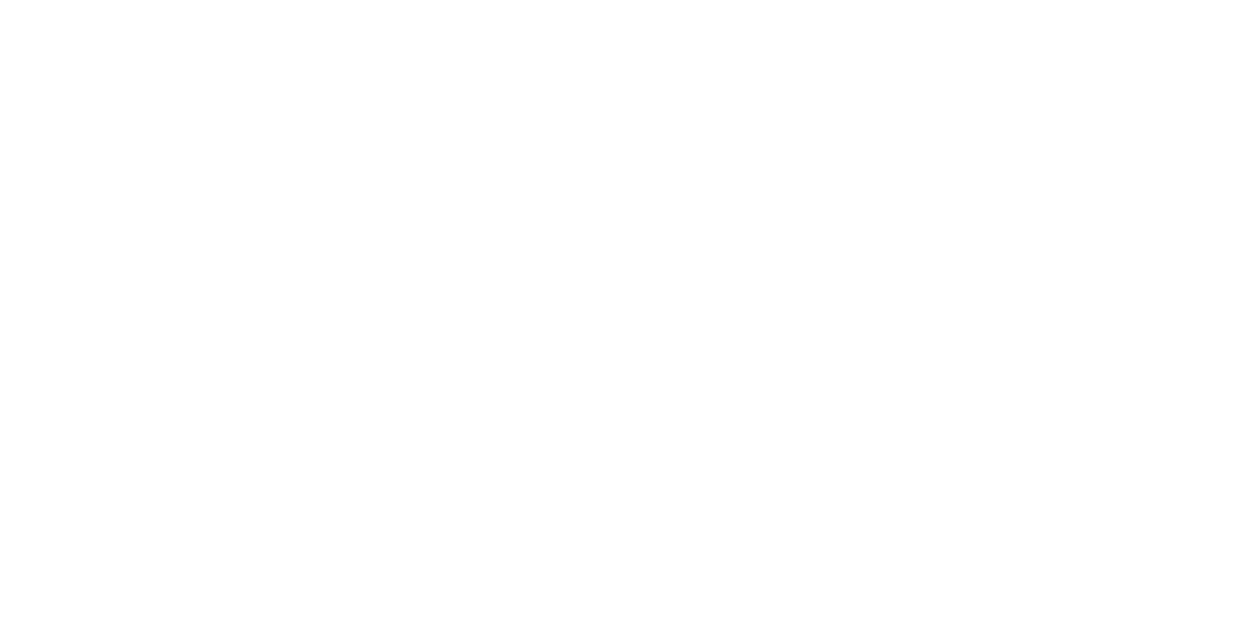

In [7]:
analytics = model.get_analytics()
print(analytics)
# print(analytics, file=open(f'{id}_stats.txt','w'))

fig = model.get_trails()
# fig.savefig(f'{id}_trails.png')

fig = model.get_histogram()
# fig.savefig(f'{id}_histogram.png')

fig = model.get_wiggle_map()  # slow
# fig.savefig(f'{id}_wiggle_map.png')

fig = model.get_location_map(do_kdeplot=False)
# fig.savefig(f'{id}_location_map_fast.png')

fig = model.get_location_map()  # slow
# fig.savefig(f'{id}_location_map.png')

ani = model.get_ani(show_separation=True)  # slow
# ani.save(f'{id}_ani.mp4')


## Other Analytics
More detailed and less aggregate values can be found in the `history_`... sections of model and agent. Such as `agent.history_locations`, `agent.history_speeds`, `agent.history_wiggles`, `agent.history_collisions`, __`model.history_state`__, `model.history_wiggle_locs`, `model.history_collision_locs`, `model.steps_taken`, `model.steps_exped`, `model.steps_delay`.  These are less friendly to approach but the raw data is available.